In [83]:
# Import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np
from time import strptime

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.preprocessing import RobustScaler

In [128]:
# Import the 2 CSV Data into our IDE
df1 = pd.read_csv(r"C:\Users\HENRY OKEOMA\Desktop\Data Science\JOBS\data JJ Finance\X.csv")
df2 = pd.read_csv(r"C:\Users\HENRY OKEOMA\Desktop\Data Science\JOBS\data JJ Finance\y.csv")

### Data Dictionary

id: unique identifier of the account

• existing_score: the score of the existing machine learning model (you may use it as an input 
or for checking if your model performs better than the existing model)

• open_to_buy: the difference between the credit limit and the balance. If the customer does 
not have a credit card, it is NaN.

• months_since_first_loan_issued: number of months since the first loan was issued. If the 
customer has not taken any loans, it is NaN

• existing_credit_card_utilization: balance / credit limit * 100, e.g. 30 means that 30% of the 
credit limit is utilized. If the customer does not have a credit card already, it is NaN

• n_months_mortgage_loan_paid: number of months during which the balance of the 
account decreased. If the customer does not have a mortgage already, it is NaN


In [85]:
# Feature DataFrame
df1.head(2)

,id,existing_score,open_to_buy,months_since_first_loan_issued,existing_credit_card_utilization,n_months_mortgage_loan_paid
0,0,287.0,68.0,52.0,NaN,12.0
1,1,457.0,603.0,NaN,NaN,6.0


In [86]:
# Check missing values
df1.isnull().sum()

id                                     0
existing_score                         0
open_to_buy                         1577
months_since_first_loan_issued      2091
existing_credit_card_utilization    3426
n_months_mortgage_loan_paid          880
dtype: int64

In [87]:
# Check for duplicates
df1.duplicated().sum()

0

In [88]:
# label or target DataFrame
df2.head(3)

,id,label
0,0,0
1,1,0
2,2,0


In [89]:
# Check for missing numbers
df2.isnull().sum()

id       0
label    0
dtype: int64

In [90]:
# Check for duplicates on the Label
df2.duplicated().sum()

0

In [91]:
# Data Description (Statistical analysis)
df1.describe().round(2)

,id,existing_score,open_to_buy,months_since_first_loan_issued,existing_credit_card_utilization,n_months_mortgage_loan_paid
count,10000.00,10000.00,8423.00,7909.00,6574.00,9120.00
mean,4999.50,455.10,6366.14,94.76,48.87,9.13
std,2886.90,148.47,10395.44,75.16,36.67,3.94
min,0.00,71.00,0.00,0.00,0.00,0.00
25%,2499.75,338.00,645.00,38.00,10.00,7.00
50%,4999.50,436.00,2381.00,76.00,48.00,10.00
75%,7499.25,572.00,7569.00,135.00,86.00,12.00
max,9999.00,801.00,260373.00,553.00,134.00,14.00


In [92]:
# Based on the data dictionary,months_since_first_loan_issued & n_months_mortgage_loan_paid
# are time bound, hence we shall replace them with -1

# Fill missing values with a placeholder value (e.g., -1)
df1["months_since_first_loan_issued"].fillna(-1, inplace=True)

# Fill missing values with a placeholder value (e.g., -1)
df1["n_months_mortgage_loan_paid"].fillna(-1, inplace=True)

In [93]:
# Check missing values
df1.isnull().sum()

id                                     0
existing_score                         0
open_to_buy                         1577
months_since_first_loan_issued         0
existing_credit_card_utilization    3426
n_months_mortgage_loan_paid            0
dtype: int64

In [94]:
# Replace the remaining NAN with 0 
df1.fillna(0, inplace=True)

# Check missing values
df1.isnull().sum()

id                                  0
existing_score                      0
open_to_buy                         0
months_since_first_loan_issued      0
existing_credit_card_utilization    0
n_months_mortgage_loan_paid         0
dtype: int64

### Exploratory Data Analysis
- This is required to have an understanding of the data and how it looks like

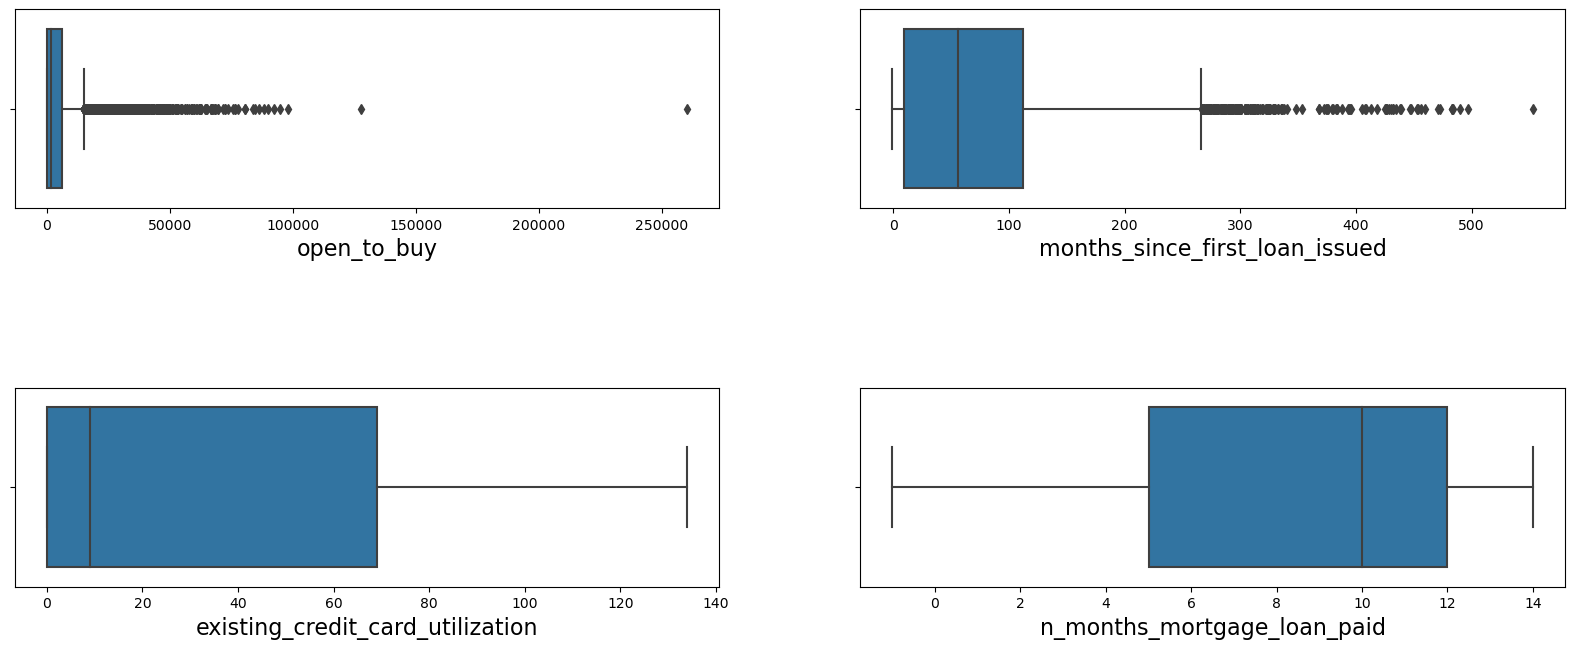

In [96]:
# We shall use the boxplot to visisualise all the numerical columns. This will enable us to point areas 
# we may find useful insights

import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.boxplot(df1['open_to_buy'], ax = axs[0,0])
plt2 = sns.boxplot(df1['months_since_first_loan_issued'], ax = axs[0,1])
plt3 = sns.boxplot(df1['existing_credit_card_utilization'], ax = axs[1,0])
plt4 = sns.boxplot(df1['n_months_mortgage_loan_paid'], ax = axs[1,1])

# Increase the label font size
plt1.set_xlabel('open_to_buy', fontsize=16)
plt2.set_xlabel('months_since_first_loan_issued', fontsize=16)
plt3.set_xlabel('existing_credit_card_utilization', fontsize=16)
plt4.set_xlabel('n_months_mortgage_loan_paid', fontsize=16)

  # Adjust the vertical spacing between subplots
plt.subplots_adjust(hspace=0.9)
plt.show()

#### We have outliers in open_to_buy and months_since_first_loan_issued, we shall handle this in our data preprocessing stage.

#### Existing credit card utilization ranged from 0 to135 and positively skewed while the no_of_months_mortgage_loan is paid is negatively skewed.

0.23777777526289318
-0.8613187485570086


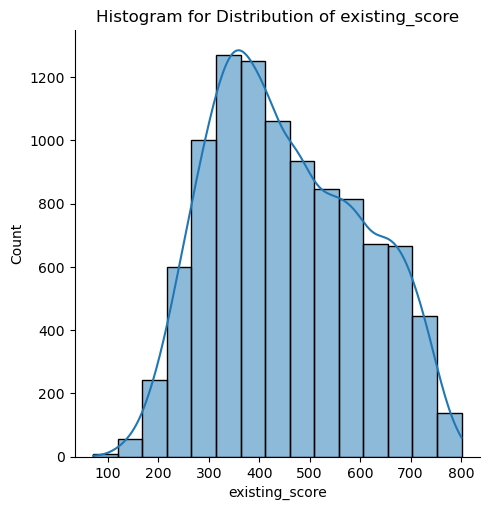

In [97]:
# Histogram of the Existing score
sns.displot(data=df1, x='existing_score', kde=True, bins=15)
plt.title('Histogram for Distribution of existing_score')
print(df1['existing_score'].skew())
print(df1['existing_score'].kurtosis())

#### We have almost a normal distribution as regards to skewness (0.2). No outliers are present (platykurtic). we shall see the boxplot below

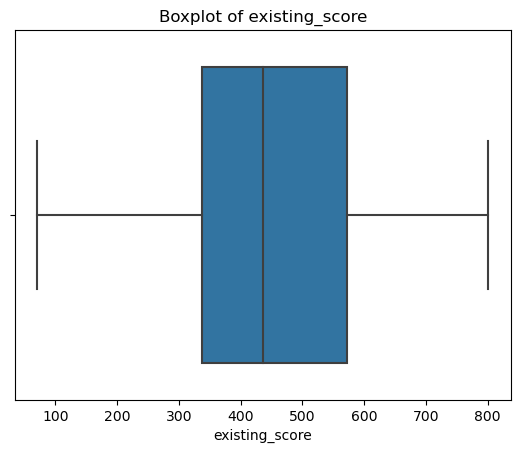

In [98]:
# Boxplot of Existing Score
plt.title('Boxplot of existing_score')
sns.boxplot(df1['existing_score']);

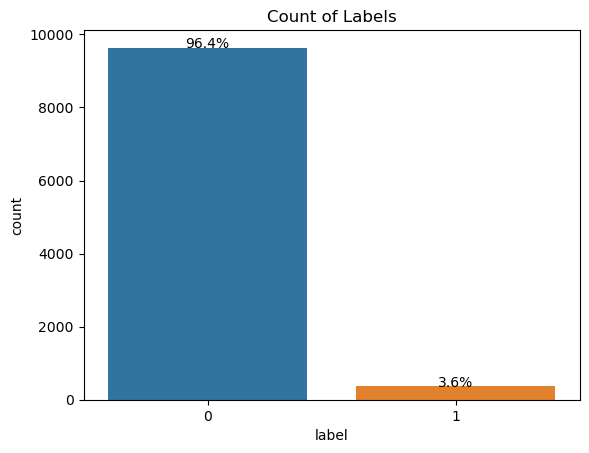

In [36]:
# Visualise the Label

plt.title('Count of Labels')
ax = sns.countplot(data=df2, x='label')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.1f}%'.format(height / len(df2) * 100), ha="center")

plt.show()

In [99]:
label_counts = df2['label'].value_counts()
label_counts

0    9635
1     365
Name: label, dtype: int64

#### Imbalanced label, most of the accounts pay there balance for 2months during the next 12 months at a good rate of 96.4%, only 3.6% fail to pay for 2months during the next 12months

In [100]:
# Merge the 2 data frame, we need to plot our heatmap to confirm if any of the features have a relationship with label
df = pd.merge(df1,df2,how="inner",on="id")

df.head(2)

,id,existing_score,open_to_buy,months_since_first_loan_issued,existing_credit_card_utilization,n_months_mortgage_loan_paid,label
0,0,287.0,68.0,52.0,0.0,12.0,0
1,1,457.0,603.0,-1.0,0.0,6.0,0


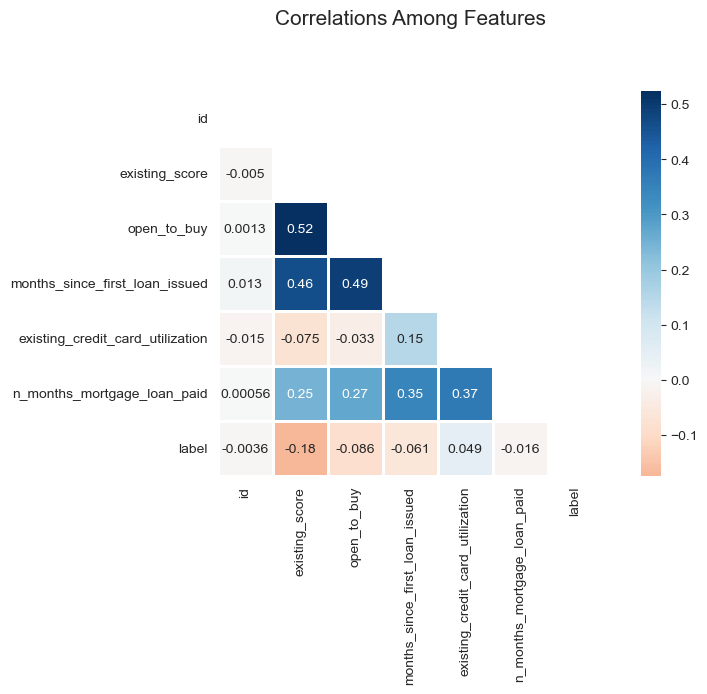

In [102]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 15, pad = 40);

#### None of the features have strong positive or negative relationship with the Label. Although some weak correlation exist among features

### Feature Engineering/ Data Pre-Processing
- this is done in order to put the data in the appropriate format towards modelling


### Split the data

In [110]:
y = df2['label']
y.head(2)

0    0
1    0
Name: label, dtype: int64

In [111]:
# Drop the i.d column, as we dont need it in our model
X = df1[['existing_score', 'open_to_buy', 'months_since_first_loan_issued',
       'existing_credit_card_utilization', 'n_months_mortgage_loan_paid']]

X.head(2)

,existing_score,open_to_buy,months_since_first_loan_issued,existing_credit_card_utilization,n_months_mortgage_loan_paid
0,287.0,68.0,52.0,0.0,12.0
1,457.0,603.0,-1.0,0.0,6.0


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 5)
(2000, 5)
(8000,)
(2000,)


In [113]:
from sklearn.ensemble import RandomForestClassifier
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['scaler', RobustScaler()],
                                ['classifier', LogisticRegression(random_state=42,
                                                                  max_iter=1000)]])

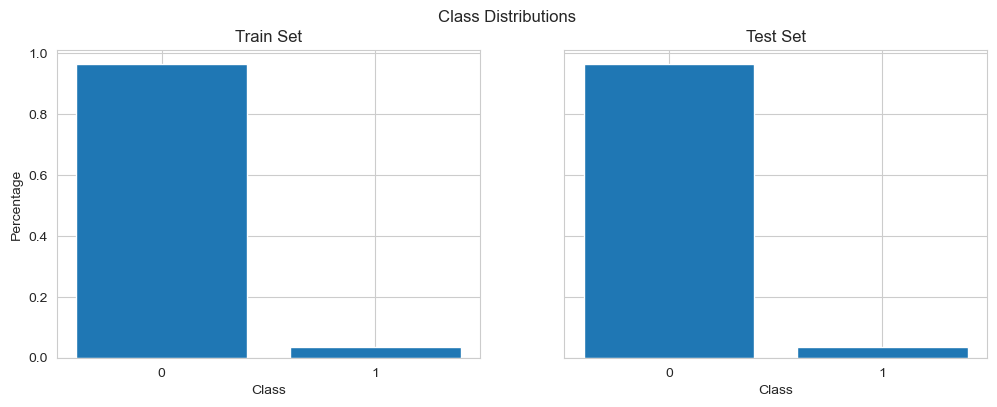

In [114]:
# Get the value counts of our train and test sets
y_train_vals = y_train.value_counts()
y_test_vals = y_test.value_counts()

# Plot the distributions to check if they match the original
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
ax1.bar(y_train_vals.index.astype(str), y_train_vals.values/sum(y_train_vals.values))
ax2.bar(y_test_vals.index.astype(str), y_test_vals.values/sum(y_test_vals.values))
plt.suptitle("Class Distributions")
ax1.set_title("Train Set")
ax1.set_xlabel("Class")
ax1.set_ylabel("Percentage")
ax2.set_title("Test Set")
ax2.set_xlabel("Class")
plt.show()

#### We have an equal class distribution on both the training set and testing set

In [115]:
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=42)

In [116]:
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

In [117]:
grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_ * 100
test_score = grid_search.score(X_test, y_test) * 100
print(f'Cross-validation score: {cv_score:.2f}%\nTest score: {test_score:.2f}%')

Cross-validation score: 78.97%
Test score: 78.89%


#### Use a different Model to access performance

In [118]:
# Use RandomForest as a model
pipeline = imbpipeline(steps=[
    ['smote', SMOTE(random_state=42)],
    ['scaler', RobustScaler()],
    ['classifier', RandomForestClassifier(random_state=42, n_estimators=100)]  
])

In [119]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

In [120]:
grid_search2 = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

In [121]:
grid_search2.fit(X_train, y_train)
cv_score = grid_search2.best_score_ * 100
test_score = grid_search2.score(X_test, y_test) * 100
print(f'Cross-validation score: {cv_score:.2f}%\nTest score: {test_score:.2f}%')

Cross-validation score: 73.21%
Test score: 72.14%


### Logistics Regresion performed better than the random forest as above

In [124]:
from sklearn.ensemble import RandomForestClassifier
pipeline = make_pipeline(
    SMOTE(random_state=42),
    RobustScaler(),
    RandomForestClassifier(random_state=42, n_estimators=100)
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Access feature importances from the RandomForestClassifier
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(feature_importance_df)


                            Feature  Importance
0                    existing_score    0.352601
1                       open_to_buy    0.231511
4       n_months_mortgage_loan_paid    0.204745
2    months_since_first_loan_issued    0.125791
3  existing_credit_card_utilization    0.085352


In [125]:
# Put in a dataframe
dataframe = pd.DataFrame(feature_importance_df)
dataframe

,Feature,Importance
0,existing_score,0.352601
1,open_to_buy,0.231511
4,n_months_mortgage_loan_paid,0.204745
2,months_since_first_loan_issued,0.125791
3,existing_credit_card_utilization,0.085352


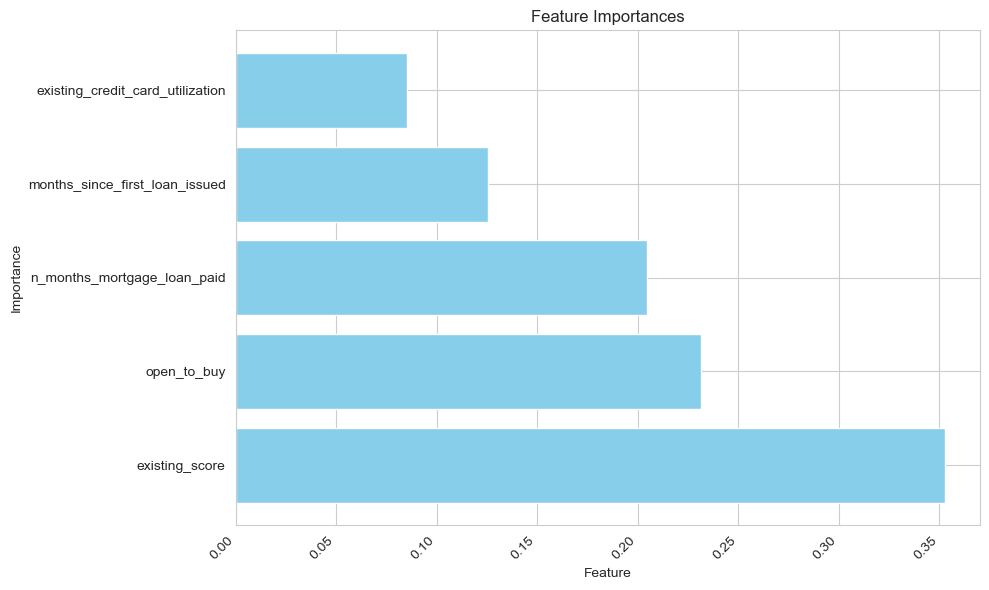

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()